<a href="https://colab.research.google.com/github/Harsh374/Elevate-Labs-Task-4/blob/main/Elevate_Labs_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 4: Classification with Logistic Regression.**

*  Objective: Build a binary classifier using logistic regression.
*  Tools:  Scikit-learn, Pandas, Matplotlib.
*  Dataset: Breast Cancer Wisconsin Dataset.
*  What You'll Learn :  Binary classification, evaluation metrics, sigmoid curve.

Import Libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [50]:
file_path = "/content/Breast Cancer Wisconsin (Diagnostic) Data Set.csv"
df = pd.read_csv(file_path)

Display basic info and first few rows

In [51]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

Drop unnecessary columns

In [52]:
df_cleaned = df.drop(columns=["id", "Unnamed: 32"])

Encode diagnosis column ('M' = 1, 'B' = 0)

In [53]:
label_encoder = LabelEncoder()
df_cleaned['diagnosis'] = label_encoder.fit_transform(df_cleaned['diagnosis'])

 Split features and target

In [54]:
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

Train/test split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Logistic Regression model

In [57]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Predict probabilities and classes

In [58]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

Evaluation metrics

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

Plot ROC Curve

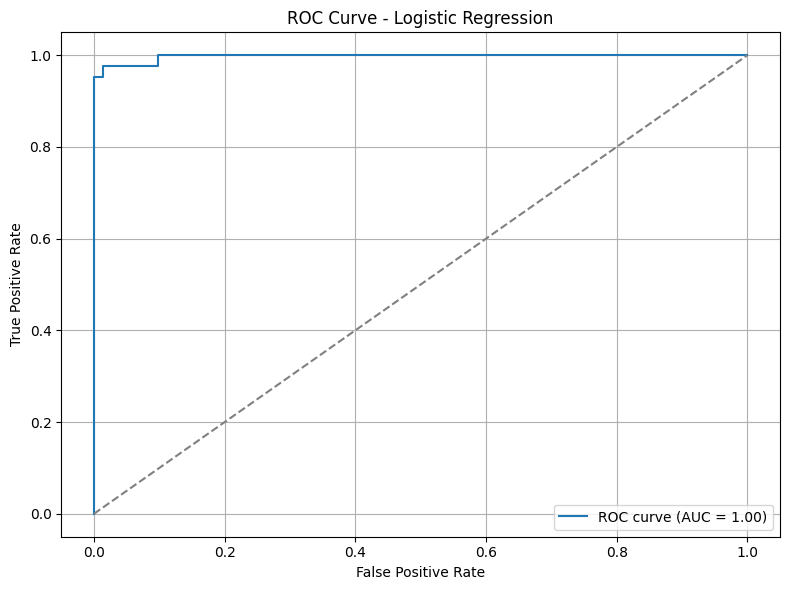

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Show confusion matrix

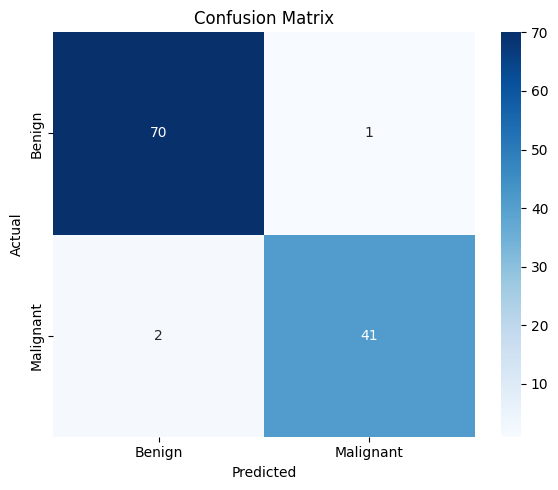

In [61]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [62]:
print("Precision =",precision )
print("Recall =",recall )
print("ROC AUC =",roc_auc )

Precision = 0.9761904761904762
Recall = 0.9534883720930233
ROC AUC = 0.99737962659679


Sigmoid function definition

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Calculate predicted probabilities

In [64]:
print(y_probs)

[1.13590250e-01 9.99990991e-01 9.96920905e-01 5.10134225e-04
 6.06389713e-05 1.00000000e+00 9.99999998e-01 9.65096937e-01
 3.79342140e-01 7.59402734e-04 4.98717826e-02 9.87592879e-01
 6.07381873e-03 8.56069117e-01 1.62175599e-03 9.99259818e-01
 1.85245908e-03 1.11662359e-05 8.18375684e-07 9.99998883e-01
 8.41633901e-02 9.74778299e-03 9.99999996e-01 7.89186669e-05
 1.13874333e-03 5.84587240e-04 1.07444521e-03 5.97518345e-03
 2.85311713e-03 9.99991817e-01 5.17409813e-04 1.48760128e-04
 2.16094439e-03 5.49413839e-03 1.40706288e-04 2.42334266e-03
 9.42415985e-01 2.89870352e-03 9.99911214e-01 4.81363757e-02
 7.12433090e-05 9.99593392e-01 2.46640626e-03 9.63884505e-04
 1.99892051e-02 7.15547342e-02 3.98571939e-04 4.90625569e-04
 3.04698010e-02 6.14016147e-04 9.99879654e-01 9.99999947e-01
 3.08211520e-01 1.32293769e-02 2.73627242e-05 9.54524359e-03
 1.12878558e-04 1.00000000e+00 8.35573090e-01 1.39239947e-04
 5.01360363e-03 9.99999551e-01 9.99999999e-01 3.11060472e-02
 8.29093869e-04 1.297992

Threshold tuning

In [65]:
thresholds = np.arange(0.0, 1.01, 0.05)
precisions = []
recalls = []

In [66]:
for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plot Precision and Recall vs Threshold

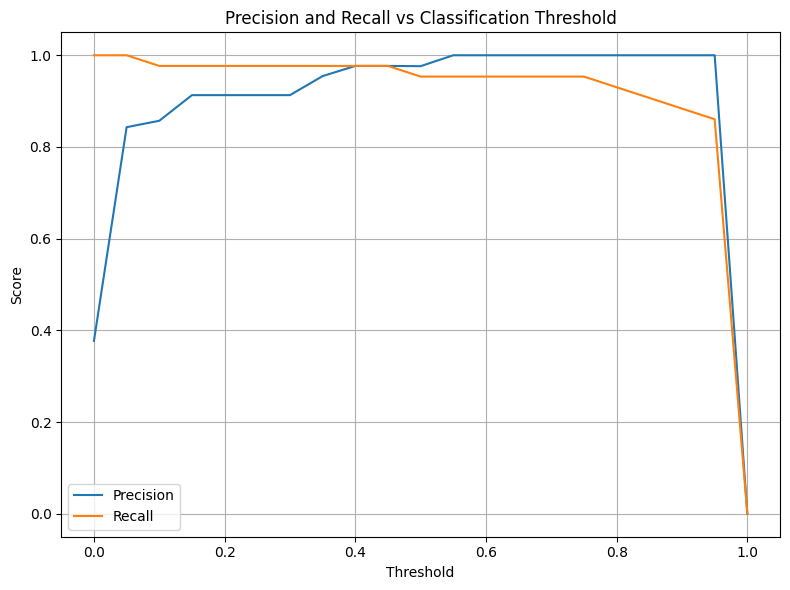

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Classification Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
print("""
Sigmoid Function Explanation:
The sigmoid function, σ(x) = 1 / (1 + e^(-x)), maps any real number to the range (0,1).
In logistic regression, it transforms the linear combination of features (w^T * x + b)
into a probability. Values above 0.5 are typically classified as positive (Malignant),
and below 0.5 as negative (Benign). The threshold can be adjusted to balance precision
and recall, as shown in the threshold tuning section.
""")


Sigmoid Function Explanation:
The sigmoid function, σ(x) = 1 / (1 + e^(-x)), maps any real number to the range (0,1).
In logistic regression, it transforms the linear combination of features (w^T * x + b)
into a probability. Values above 0.5 are typically classified as positive (Malignant),
and below 0.5 as negative (Benign). The threshold can be adjusted to balance precision
and recall, as shown in the threshold tuning section.



Example: Sigmoid function plot

In [69]:
z = np.linspace(-10, 10, 200)
sigmoid_vals = sigmoid(z)

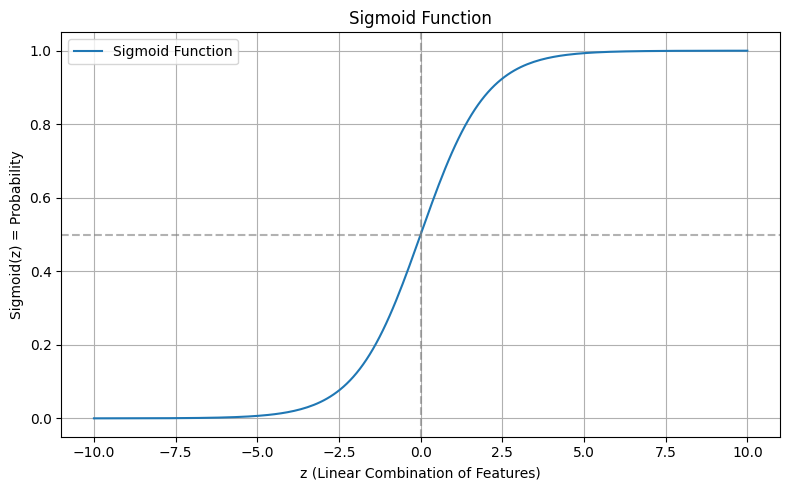

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(z, sigmoid_vals, label='Sigmoid Function')
plt.axvline(0, color='gray', linestyle='--', alpha=0.6)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.6)
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Combination of Features)")
plt.ylabel("Sigmoid(z) = Probability")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()